# Market Segmentation Kmeans Cluster

---

## The following dataset was collected from Kaggle to explore Market Basket Analysis

### According to Kaggle, this dataset was created purely for learning purposes of customer segmentation, and this is how it reads:
### Content
#### You're the owner of a supermarket at a mall and through membership cards, you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
#### Spending Score is something you assign to the customer based on your defined parameters like customer behaviour and purchasing data.
#### Problem Statement
#### You own the mall and want to understand the customers like who can easily converge [Target Customers] so that sense can be given to the marketing team and plan the strategy accordingly.

---

In [319]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style = 'whitegrid')
%matplotlib inline
import plotly
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


---

#### Now that I've gathered all the packages necessary to conduct my analysis, I'm going to import my dataset into a Pandas Dataframe, cleanse it, mine it and create some awesome visualizations to explain and support my findings.

In [321]:
df = pd.read_csv('/home/dalux/Downloads/customer-segmentation-tutorial-in-python.zip')

In [322]:
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [323]:
df.shape

(200, 5)

In [324]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


#### Surprisingly this is a very clean dataset ( shout out to the DBA). From my initial exploration, I can see that most of the variables are numeric, and they include CustomerID, Age, Annual Income measured per $ 1 000, and Spending Score (1-100). The only categorical variable in the Dataset is Gender.
#### Rember that the spending score was determined beforehand and it's basically based on customer behaviour and previous purchasing data, so it's bound to be a very good metric. Let's dive a little deeper down the rabbit hole and make sure that every observation is truly unique with no customers being included more than once.


In [325]:
more_than_once = df['CustomerID'].duplicated().sum() 

In [326]:
more_than_once # the customers are all uniqe or different people.

0

#### Now that I'm certain every observation is unique I can start looking for some relationships between my variables. I  like to start with a picture of the correlation between numerical variables so that I have a better idea of questions worth asking and persuing. 

In [332]:
cor = df.corr().loc['Annual Income (k$)': ]
cor

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


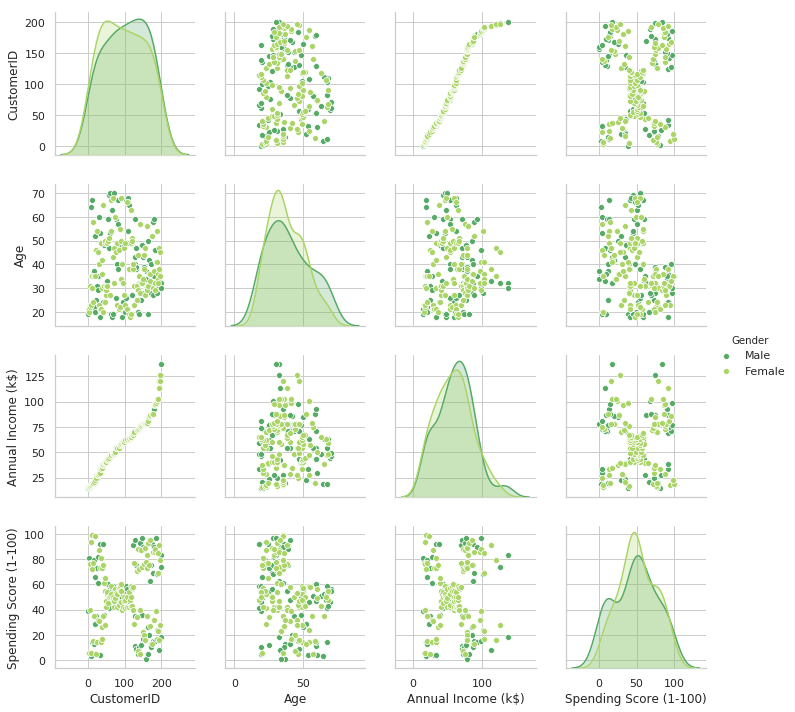

In [365]:
sns.pairplot(df, hue='Gender', palette='summer')

#### From both the table and pair plot I can say there appears to be no clear correlation between any of these variables, but interestingly enough, I can see some clustering between the Annual Income and the Spending Score (1-100) variables, which are both very tightly related to customers. I'll use these two features to perform a Kmeans Cluster analysis to better understand these customers better, but before that, let's see what else we can gather from this dataset shall we?

---

Text(0.5, 1.0, 'Customer Yearly Earnings')

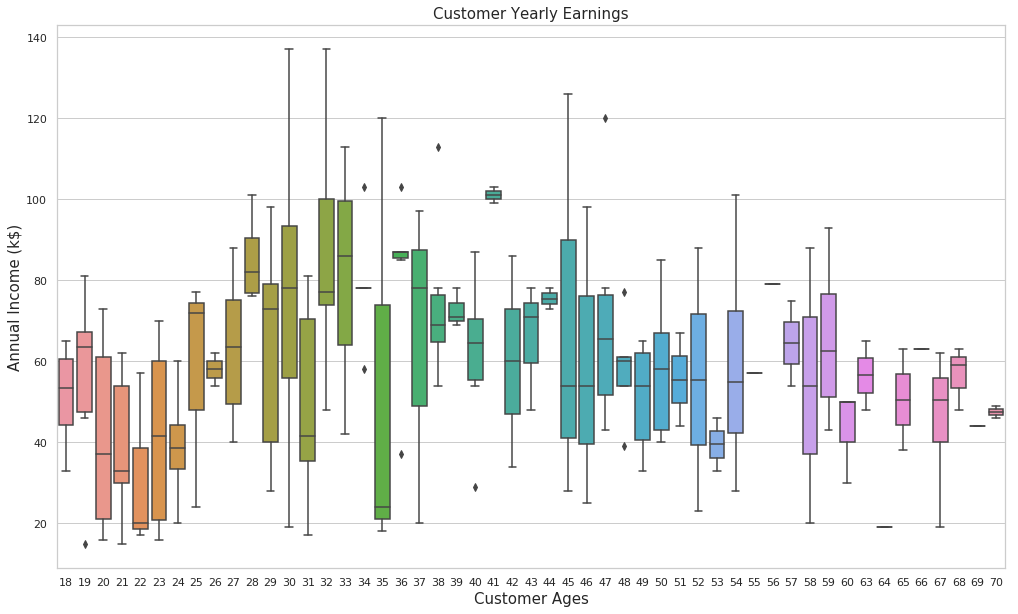

In [349]:
plt.figure(figsize=(17,10))
sns.boxplot(data=df,x='Age',y= 'Annual Income (k$)')

plt.xlabel('Customer Ages',fontsize=15)
plt.ylabel('Annual Income (k$)',fontsize=15)
plt.title('Customer Yearly Earnings',fontsize=15)

#### Looking at the above boxplots we can see that customers in their late 20s to late 30s earn the most amount of money on average. Speaking as a businessman, these people would make the perfect group to target in terms of marketing ads and solidifying their customer loyalty because they probably account for a major portion of customers that frequent the mall. These could be young parents, people going on dates, people watching movies at cinema ect, the same could be said of the younger crowd in their late teen and early 20s, that perhaps don't have that much to spend, but we should make sure we make this mall the only place they want to go to. The elderly's stats money-wise is surprisingly similar to people in their mid-20s, we should also consider them as a group we can develop special packages for.

---

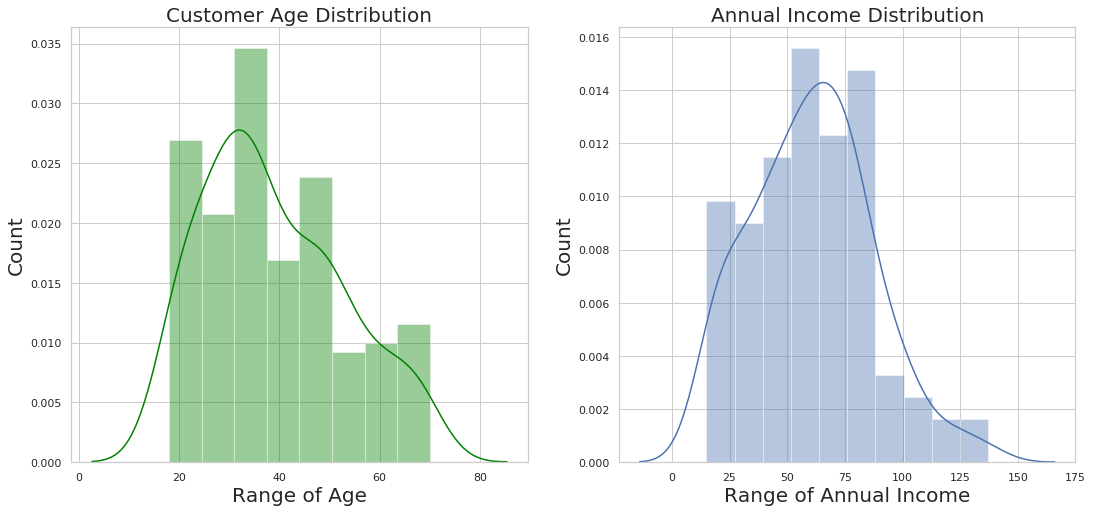

<Figure size 1296x576 with 0 Axes>

In [346]:
plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 2)
sns.distplot(df['Annual Income (k$)'])
plt.title('Annual Income Distribution', fontsize = 20)
plt.xlabel('Range of Annual Income',fontsize=20)
plt.ylabel('Count',fontsize=20)


plt.subplot(1, 2, 1)
sns.distplot(df['Age'], color = 'green')
plt.title('Customer Age Distribution', fontsize = 20)
plt.xlabel('Range of Age',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.figure(figsize=(18, 8))
plt.show()

#### The green Customer age distribution histogram confirms what we expected earlier, that the majority of our customers are in their late teens to early 40s, and the Annual Income distribution tells us that these people's yearly income is in the healthy range of 25 - 80 k$ a year, this mall could be in a very affluent neighbourhood.

----

#### Ok, enough with the categorical values, for now, let's segment the data into clusters.

#### I've chosen to use the K-means clustering algorithm for this market basket analysis because its the best and most popular algorithm for flat clustering. I'll begin by selecting the feature I'm interested in, Annual Income (k$) & Spending Score (1-100) in this case.

In [350]:
clus = df[['Annual Income (k$)','Spending Score (1-100)']]

In [351]:
clus.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


#### Now that I have the data sorted, I'm going to iterate over it using the k-means algorithm from sikitlearn along with the silhouette-score metric to find out what the optimum number of centroids is.  The reason I'm using the silhouette-score it that it seems to be the better metric compared to the elbow method. but I'll display both of them at work here. Starting with the silhouette score.

In [359]:
n=2
for i in range(3,10):
    kmeans = KMeans(n_clusters= i).fit(clus)
    labels = kmeans.labels_
    n +=1
    print(n,'centers s_score =',silhouette_score(clus,labels))

3 centers s_score = 0.46761358158775435
4 centers s_score = 0.4931963109249047
5 centers s_score = 0.553931997444648
6 centers s_score = 0.5393922132561455
7 centers s_score = 0.5288104473798049
8 centers s_score = 0.45827056882053113
9 centers s_score = 0.45912667975312715


#### When using the silhouette score, we pick k based the highest value we get from our iterations. I began the iteration using k =3 meaning three clusters, and iterated till I fit the data using 10 clusters. As you can see, the numbers rose steadily until we got to the sixth cluster where they began to fall back down, this indicates that 5 clusters are the perfect fit for this dataset.

----

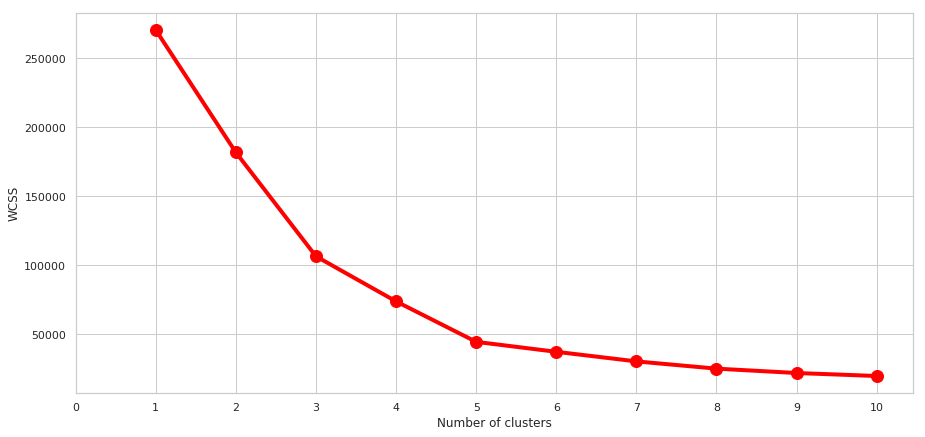

In [366]:
WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(clus)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (15,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'red')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

#### We can see that the elbow method also suggests 5 clusters, but compared to the previous metric its a little harder to tell the best number of clusters to choose using this method.

----

In [361]:
kmeans = KMeans(5)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

---

In [362]:
cluster_no = kmeans.fit_predict(clus)

In [363]:
import warnings
warnings.filterwarnings('ignore')

clus['cluster']= cluster_no
clus.head()

,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,1
1,15,81,2
2,16,6,1
3,16,77,2
4,17,40,1


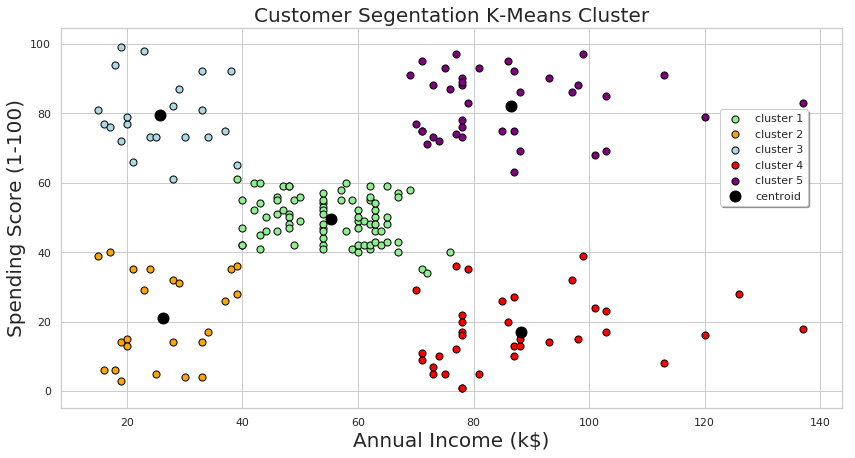

In [375]:
df1 = clus[clus.cluster==0]            #seperate the dataframe by cluster
df2 = clus[clus.cluster==1]
df3 = clus[clus.cluster==2]
df4 = clus[clus.cluster==3]
df5 = clus[clus.cluster==4]

centers = kmeans.cluster_centers_

plt.figure(figsize=(14,7))
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],
            s=50, c='lightgreen',
            marker='o', edgecolor='black',
            label='cluster 1')

plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='cluster 2')

plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],
            s=50, c='lightblue',
            marker='o', edgecolor='black',
            label='cluster 3')

plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],
            s=50, marker='o',
            c='red', edgecolor='black',
            label='cluster 4')

plt.scatter(df5['Annual Income (k$)'],df5['Spending Score (1-100)'],
            s=50, marker='o',
            c='purple', edgecolor='black',
            label='cluster 5')

plt.scatter(centers[:, 0],centers[:, 1], color= 'black',label='centroid',s=120)


plt.xlabel('Annual Income (k$)',fontsize=20)
plt.ylabel('Spending Score (1-100)',fontsize=20)
plt.title('Customer Segentation K-Means Cluster',fontsize=20)
plt.legend(loc='upper center', bbox_to_anchor=(0.9, 0.8), shadow=True, ncol=1)
plt.show()

#### So, we know that when it comes to unsupervised learning, we're working with unlabeled data, and we rely on the algorithm to help us make some sense of the data, and in this case, we can see that the algorithm has produced 5 distinct clusters.

#### Cluster 1(Green): Represents a group commonly known as roamers, they're a group we should focus on when it comes to the supermarket because A) they've got the money to spend and, B) They could just as easily drop in the spending score metric if they find themselves dissatisfied with our shop and in that way we lose money, but making them happy would make them spend more and thus increase their spending score and our revenue. 

#### Cluster 2(Orange): These customers are rated very low in terms of spending score, but that could be because they don't really earn that much money because they're also very low in term of annual income so that could explain why they're low position. I think the best thing we can do for this group is to offer them extra points now and then, and do things flash sales or offer discounts on some of the items they purchase most, hopefully, that'll increase their spending.

#### Cluster 3 (Blue): We're very happy with there customers, and improvements to our shop will only benefit them more. the same applies to Cluster 5(Purple).

#### Cluster 4 (Red): The main goal is to get these customers to join the guys in the fifth cluster, maybe we can use KNN algorithm to figure out what they're most likely to buy and stack up on those because this algorithm doesn't go that deep.

---

## This conlcudes the analysis. As always, your feedback is wanted and appreciared. Thank you for taking the time to check out my notebook